# Phase Prediction Mode Observation Testing at GMRT 

# Obsevation Parameters for the Pulsar 

## Pulsar  1
1. PSR1: B1702-19 
2. observation start time 1: IST Time: 10:42:04.485276160 
4. observation start time 2: IST Time: 11:15:12.249827840
5. Duration of observation : 15 min 
6. Frequency of Observation : 550.049

## Pulsar 2 
1. PSR2: B1929+10 
2. observation start time 1:IST Time: 10:32:31.375577600
4. observation start time 2:IST Time: 11:05:27.060533760
5. Duration of observation : 5 min 
6. Frequency of Observation : 550.049

# gptool folding output info 

## Pulsar: J1705-1906
### Start time 1 
- Pulsar period: 298.972322035 ms 298.972370317 ms
- Dispersion measure: 22.90719223 pc/cc
- Number of bins in folded profile: 3650
- Phase of pulsar profile will be offset by 0
- Polyco based folding to be performed using tempo2.
- MJD of observation is 60327.216718579576991
- Number of coefficients generated for each span: 12
- Validity of each span: 60 mins
- Maximum Hour Angle: 12

### Start time 2 
- Pulsar period: 298.972370317 ms
- Dispersion measure: 22.90719223 pc/cc
- Number of bins in folded profile: 3650
- Phase of pulsar profile will be offset by 0
- Polyco based folding to be performed using tempo2.
- MJD of observation is 60327.239725113751774
- Number of coefficients generated for each span: 12
- Validity of each span: 60 mins
- Maximum Hour Angle: 12

## Pulsar: J1932+1059

### Start time 1 
- Pulsar period: 226.518864569 ms
- Dispersion measure: 3.183446884 pc/cc
- Number of bins in folded profile: 2765
- Phase of pulsar profile will be offset by 0
- Polyco based folding to be performed using tempo2.
- MJD of observation is 60327.210085365477426
- Number of coefficients generated for each span: 12
- Validity of each span: 60 mins
- Maximum Hour Angle: 12

### START TIME 2 

- Pulsar period: 226.518900236 ms
- Dispersion measure: 3.183446884 pc/cc
- Number of bins in folded profile: 2765
- Phase of pulsar profile will be offset by 0
- Polyco based folding to be performed using tempo2.
- MJD of observation is 60327.232952089507307
- Number of coefficients generated for each span: 12
- Validity of each span: 60 mins
- Maximum Hour Angle: 12



##  *Some basic functions* 

In [1]:
# IST to UTC
from astropy.time import Time, TimeDelta
def isttoutc(ist_datetime,offset):
# Given date and time
    
    given_date_time = Time(ist_datetime, format='iso', scale='utc')

    offset = 19800.0 # 5 hours and 30 minutes
    # Time difference to subtract
    time_difference = TimeDelta(offset, format='sec')

    # Subtract the time difference
    utc_datetime = given_date_time - time_difference
    return utc_datetime

In [2]:
# Function to calculate the phase of pulsar at given MJD (for 3 coeffs)
def calculate_phase_and_frequency(mjd, tmid, rphase, coeff1, coeff2, coeff3,f0):
    # Calculate the time difference in minutes
    dt = ((mjd - tmid) * 1440)

    # Calculate phase
    phase = rphase + dt * 60 * f0 + coeff1 + dt * coeff2 + dt**2 * coeff3
    
    # Calculate frequency in Hz
    freq = f0+ (1 / 60) * (coeff2 + 2 * dt * coeff3)

    return phase, freq,dt

## **Prediction Mode Analysis**
- The phase from the observation at GMRT for the given pulsars with respect to the start time of observation is compared with the phase predicted using the polyco command 

- This phase(polyco) is then measured at a different MJD output and then the phases with the same are compared with observation

### Pulsar 1 : 
1. PSR1: B1702-19 
2. MJD1 : 60327.216718579576991 (from gptool)

In [3]:
#MJD time of observation 
Time_ist_psr_1_mjd_1 = '2024-1-18 10:42:04.485276160' #from *.raw.hdr
Time_ist_psr_1_mjd_2 = '2024-1-18 11:15:12.249827840' #from *.raw.1.hdr

Time_utc_psr_1_mjd_1 = isttoutc(Time_ist_psr_1_mjd_1,offset=19800.0)
Time_utc_psr_1_mjd_2 = isttoutc(Time_ist_psr_1_mjd_2,offset=19800.0)
observation_date_psr_1_mjd_1 = Time_utc_psr_1_mjd_1
observation_date_psr_1_mjd_2 = Time_utc_psr_1_mjd_2
observation_time_psr_1_mjd_1 = Time(observation_date_psr_1_mjd_1,scale='utc')
observation_time_psr_1_mjd_2 = Time(observation_date_psr_1_mjd_2,scale='utc')

MJD_observation_psr_1_mjd_1= observation_time_psr_1_mjd_1.mjd #get obstime in MJD 
MJD_observation_psr_1_mjd_2= observation_time_psr_1_mjd_2.mjd #get obstime in MJD 
print(f'MJD_observation_UTC:{MJD_observation_psr_1_mjd_1}')
print(f'observation_date_time_UTC:{observation_date_psr_1_mjd_1}')
print(f'MJD_observation_UTC:{MJD_observation_psr_1_mjd_2}')
print(f'observation_date_time_UTC:{observation_date_psr_1_mjd_2}')

MJD_observation_UTC:60327.216718579584
observation_date_time_UTC:2024-01-18 05:12:04.485
MJD_observation_UTC:60327.23972511375
observation_date_time_UTC:2024-01-18 05:45:12.250


### Pulsar 2 : 
1. PSR2: B1929+10

In [4]:
#MJD time of observation 
Time_ist_psr_2_mjd_1 = '2024-1-18 10:32:31.375577600' #from *.raw.hdr
Time_ist_psr_2_mjd_2 = '2024-1-18 11:05:27.060533760' #from *.raw.1.hdr

Time_utc_psr_2_mjd_1 = isttoutc(Time_ist_psr_2_mjd_1,offset=19800.0)
Time_utc_psr_2_mjd_2 = isttoutc(Time_ist_psr_2_mjd_2,offset=19800.0)
observation_date_psr_2_mjd_1 = Time_utc_psr_2_mjd_1
observation_date_psr_2_mjd_2 = Time_utc_psr_2_mjd_2
observation_time_psr_2_mjd_1 = Time(observation_date_psr_2_mjd_1,scale='utc')
observation_time_psr_2_mjd_2 = Time(observation_date_psr_2_mjd_2,scale='utc')

MJD_observation_psr_2_mjd_1= observation_time_psr_2_mjd_1.mjd #get obstime in MJD 
MJD_observation_psr_2_mjd_2= observation_time_psr_2_mjd_2.mjd #get obstime in MJD 
print(f'MJD_observation_UTC:{MJD_observation_psr_2_mjd_1}')
print(f'observation_date_time_UTC:{observation_date_psr_2_mjd_1}')
print(f'MJD_observation_UTC:{MJD_observation_psr_2_mjd_2}')
print(f'observation_date_time_UTC:{observation_date_psr_2_mjd_2}')

MJD_observation_UTC:60327.210085365485
observation_date_time_UTC:2024-01-18 05:02:31.376
MJD_observation_UTC:60327.232952089515
observation_date_time_UTC:2024-01-18 05:35:27.061


### ***sanity check***
MJD of observation is matches with the gptool function checked in the output info

## Create dataframe of observation 

In [5]:
#Pulsar 1 Start Time 1 
import pandas as pd 
psr1 = 'B1702-19'
df_profile_psr1_mjd1 = pd.read_table("profile_flitered_psr1_mjd1.gpt", sep='\t',index_col=None)

df_profile_psr1_mjd1['time_stamp(ms)'] = df_profile_psr1_mjd1.index * 0.08192


# Define the MJD_start
initial_mjd = MJD_observation_psr_1_mjd_1

# Add a new column for the timestamp in MJD
df_profile_psr1_mjd1['timestamp_MJD'] = initial_mjd + (df_profile_psr1_mjd1['time_stamp(ms)'] / (1000 * 86400)) #increment by ms in mjd 

# Set the display option to show all digits
pd.set_option('display.float_format', '{:.15f}'.format)

In [ ]:
df_profile_psr1_mjd1

In [7]:
#Pulsar 1 Start Time 2 
import pandas as pd 
psr1 = 'B1702-19'
df_profile_psr1_mjd2 = pd.read_table("profile_flitered_psr1_mjd2.gpt", sep='\t',index_col=None)

df_profile_psr1_mjd2['time_stamp(ms)'] = df_profile_psr1_mjd2.index * 0.08192


# Define the MJD_start
initial_mjd = MJD_observation_psr_1_mjd_2

# Add a new column for the timestamp in MJD
df_profile_psr1_mjd2['timestamp_MJD'] = initial_mjd + (df_profile_psr1_mjd2['time_stamp(ms)'] / (1000 * 86400)) #increment by ms in mjd 

# Set the display option to show all digits
pd.set_option('display.float_format', '{:.15f}'.format)

In [8]:
#Pulsar 2  Start Time 1 
import pandas as pd 
psr2 = 'B1929+10'
df_profile_psr2_mjd1 = pd.read_table("profile_flitered_psr2_mjd1.gpt", sep='\t',index_col=None)

df_profile_psr2_mjd1['time_stamp(ms)'] = df_profile_psr2_mjd1.index * 0.08192


# Define the MJD_start
initial_mjd = MJD_observation_psr_2_mjd_1

# Add a new column for the timestamp in MJD
df_profile_psr2_mjd1['timestamp_MJD'] = initial_mjd + (df_profile_psr2_mjd1['time_stamp(ms)'] / (1000 * 86400)) #increment by ms in mjd 

# Set the display option to show all digits
pd.set_option('display.float_format', '{:.15f}'.format)

In [9]:
#Pulsar 2  Start Time 2 
import pandas as pd 
psr2 = 'B1929+10'
df_profile_psr2_mjd2 = pd.read_table("profile_flitered_psr2_mjd2.gpt", sep='\t',index_col=None)

df_profile_psr2_mjd2['time_stamp(ms)'] = df_profile_psr2_mjd2.index * 0.08192


# Define the MJD_start
initial_mjd = MJD_observation_psr_2_mjd_2

# Add a new column for the timestamp in MJD
df_profile_psr2_mjd2['timestamp_MJD'] = initial_mjd + (df_profile_psr2_mjd2['time_stamp(ms)'] / (1000 * 86400)) #increment by ms in mjd 

# Set the display option to show all digits
pd.set_option('display.float_format', '{:.15f}'.format)

### ***Observation from GMRT PSR1 MJD1*** 

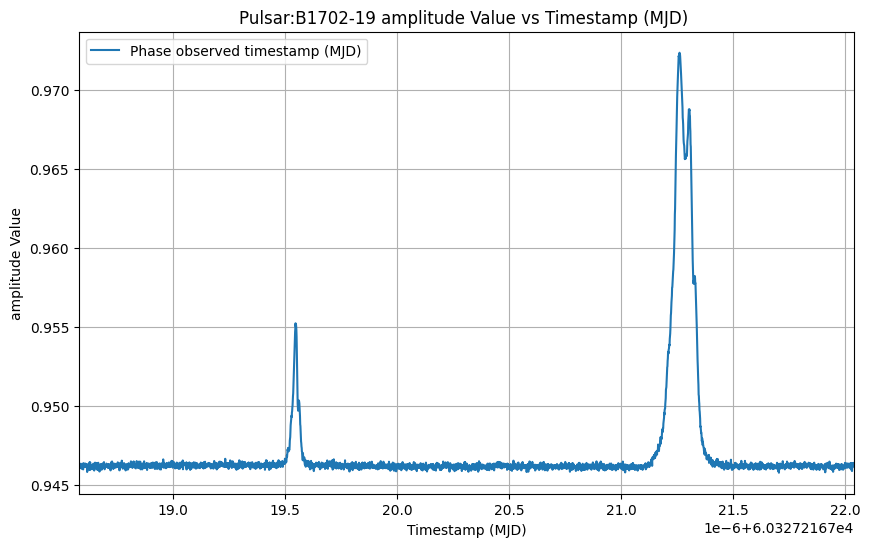

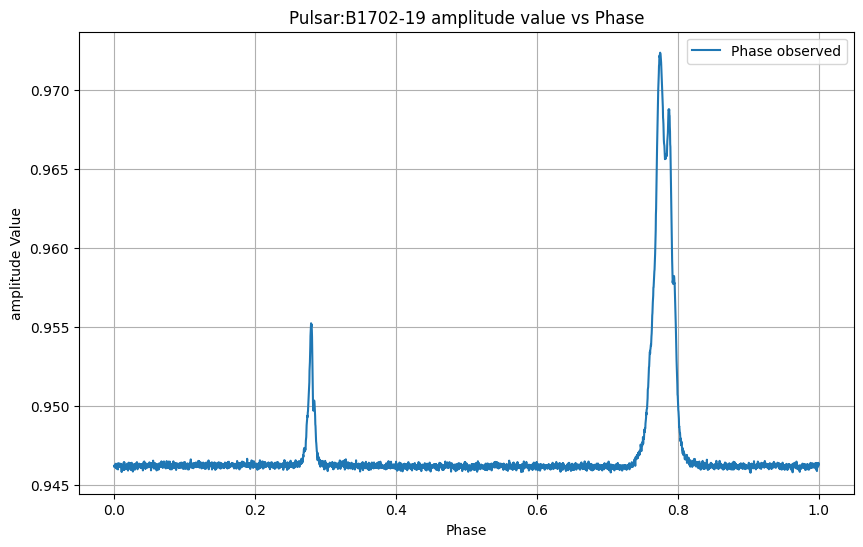

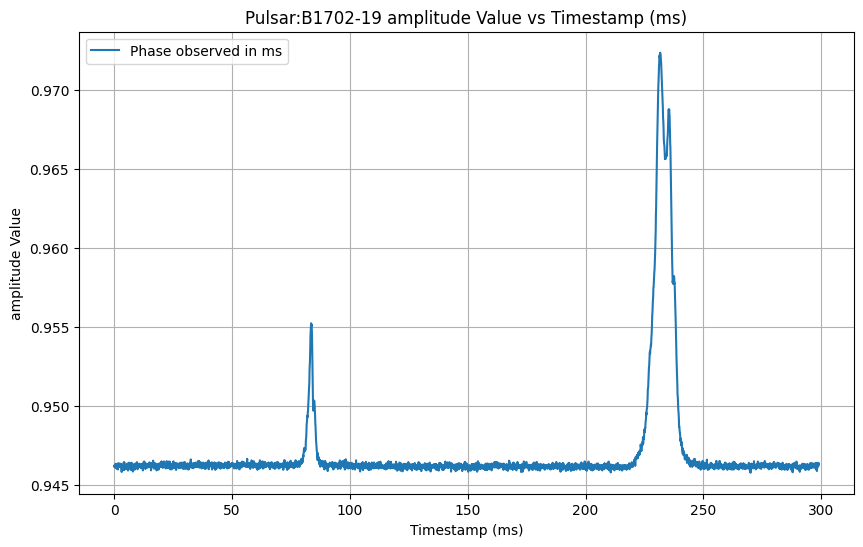

In [10]:
import matplotlib.pyplot as plt

# Plot colname value vs timestamp_MJD
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr1_mjd1['timestamp_MJD'], df_profile_psr1_mjd1['value'], linestyle='-',label = 'Phase observed timestamp (MJD)')
plt.xlabel('Timestamp (MJD)')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr1} amplitude Value vs Timestamp (MJD) ')
plt.xlim(min(df_profile_psr1_mjd1['timestamp_MJD']),max(df_profile_psr1_mjd1['timestamp_MJD']))
plt.grid()
plt.legend()
plt.show()

# Plot colname value vs phase
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr1_mjd1['#phase'], df_profile_psr1_mjd1['value'], linestyle='-', label='Phase observed')
plt.xlabel('Phase')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr1} amplitude value vs Phase')
plt.grid()
plt.legend()
plt.show()

# Plot colname value vs timestamp(ms)
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr1_mjd1['time_stamp(ms)'], df_profile_psr1_mjd1['value'], linestyle='-',label='Phase observed in ms')
plt.xlabel('Timestamp (ms)')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr1} amplitude Value vs Timestamp (ms)')
plt.grid()
plt.legend()
plt.show()

### ***Observation from GMRT PSR1 MJD2*** 

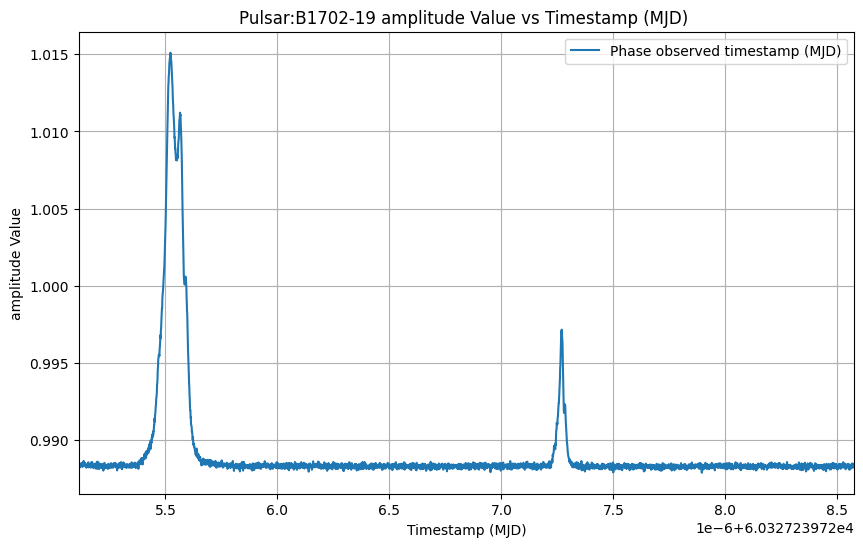

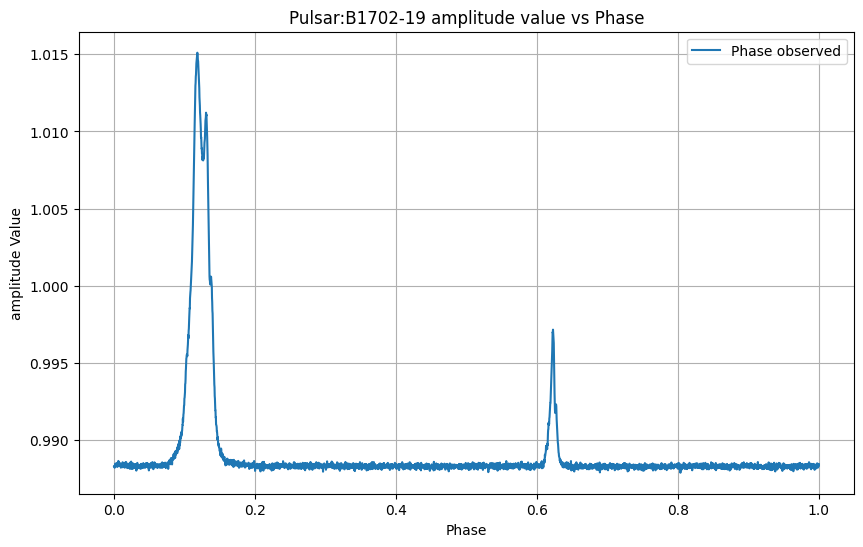

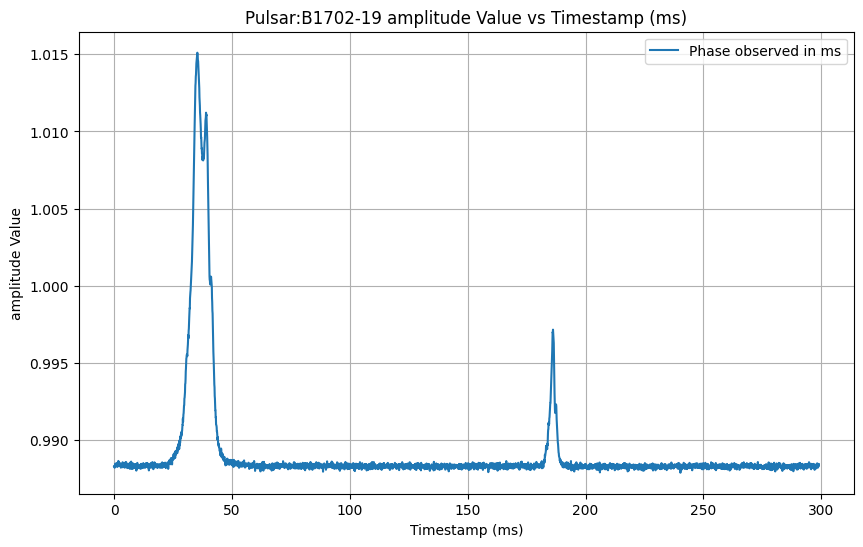

In [11]:
import matplotlib.pyplot as plt

# Plot colname value vs timestamp_MJD
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr1_mjd2['timestamp_MJD'], df_profile_psr1_mjd2['value'], linestyle='-',label = 'Phase observed timestamp (MJD)')
plt.xlabel('Timestamp (MJD)')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr1} amplitude Value vs Timestamp (MJD) ')
plt.xlim(min(df_profile_psr1_mjd2['timestamp_MJD']),max(df_profile_psr1_mjd2['timestamp_MJD']))
plt.grid()
plt.legend()
plt.show()

# Plot colname value vs phase
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr1_mjd2['#phase'], df_profile_psr1_mjd2['value'], linestyle='-', label='Phase observed')
plt.xlabel('Phase')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr1} amplitude value vs Phase')
plt.grid()
plt.legend()
plt.show()

# Plot colname value vs timestamp(ms)
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr1_mjd2['time_stamp(ms)'], df_profile_psr1_mjd2['value'], linestyle='-',label='Phase observed in ms')
plt.xlabel('Timestamp (ms)')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr1} amplitude Value vs Timestamp (ms)')
plt.grid()
plt.legend()
plt.show()

### ***Observation from GMRT PSR2 MJD1*** 

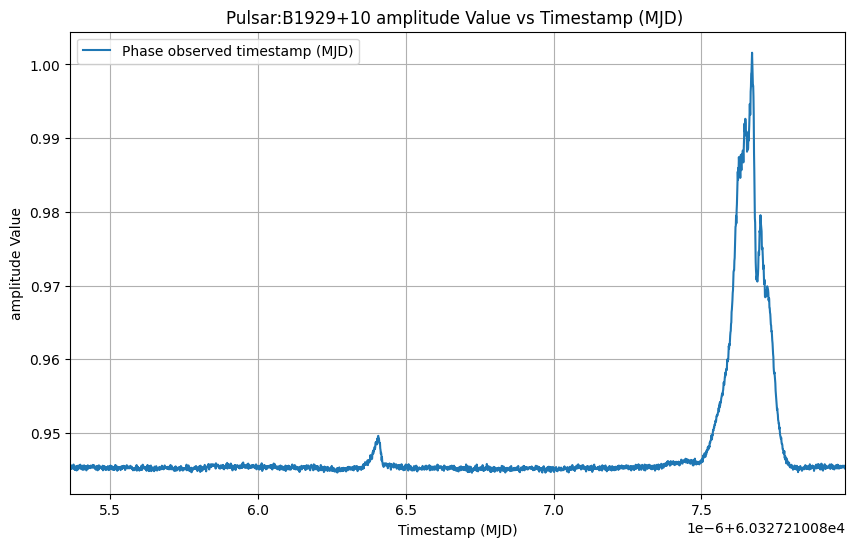

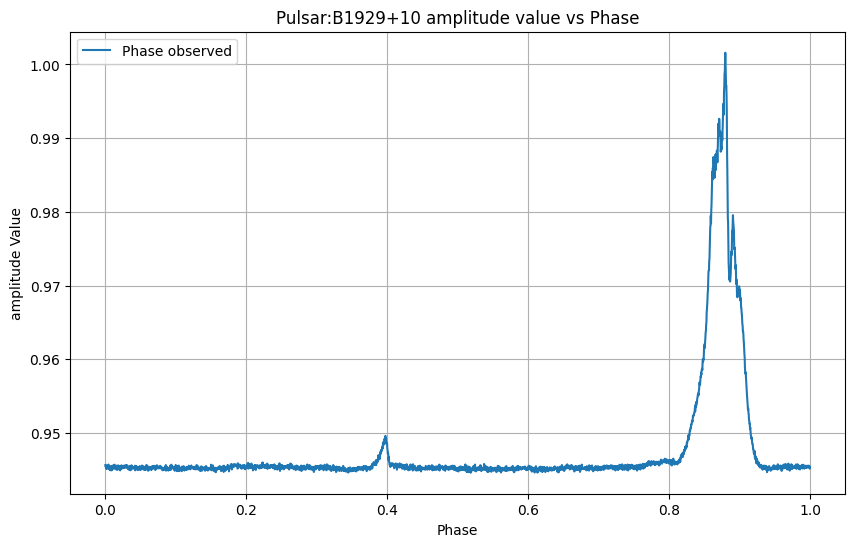

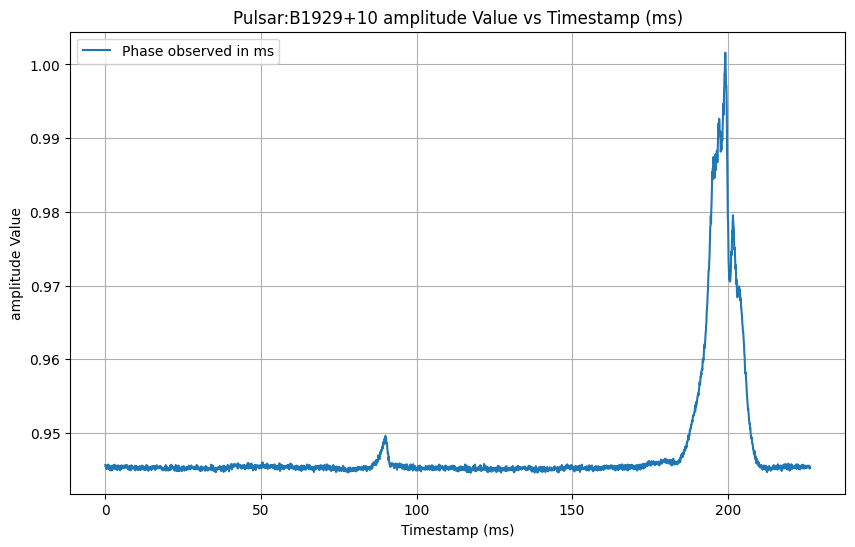

In [12]:
# Plot colname value vs timestamp_MJD for psr2
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr2_mjd1['timestamp_MJD'], df_profile_psr2_mjd1['value'], linestyle='-', label='Phase observed timestamp (MJD)')
plt.xlabel('Timestamp (MJD)')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr2} amplitude Value vs Timestamp (MJD) ')
plt.xlim(min(df_profile_psr2_mjd1['timestamp_MJD']), max(df_profile_psr2_mjd1['timestamp_MJD']))
plt.grid()
plt.legend()
plt.show()

# Plot colname value vs phase for psr2
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr2_mjd1['#phase'], df_profile_psr2_mjd1['value'], linestyle='-', label='Phase observed')
plt.xlabel('Phase')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr2} amplitude value vs Phase')
plt.grid()
plt.legend()
plt.show()

# Plot colname value vs timestamp(ms) for psr2
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr2_mjd1['time_stamp(ms)'], df_profile_psr2_mjd1['value'], linestyle='-', label='Phase observed in ms')
plt.xlabel('Timestamp (ms)')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr2} amplitude Value vs Timestamp (ms)')
plt.grid()
plt.legend()
plt.show()


### ***Observation from GMRT PSR2 MJD1*** 

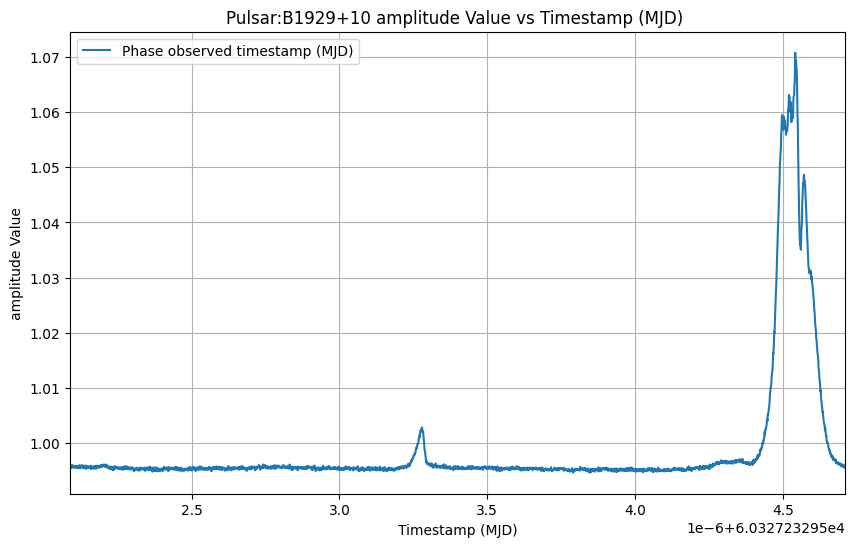

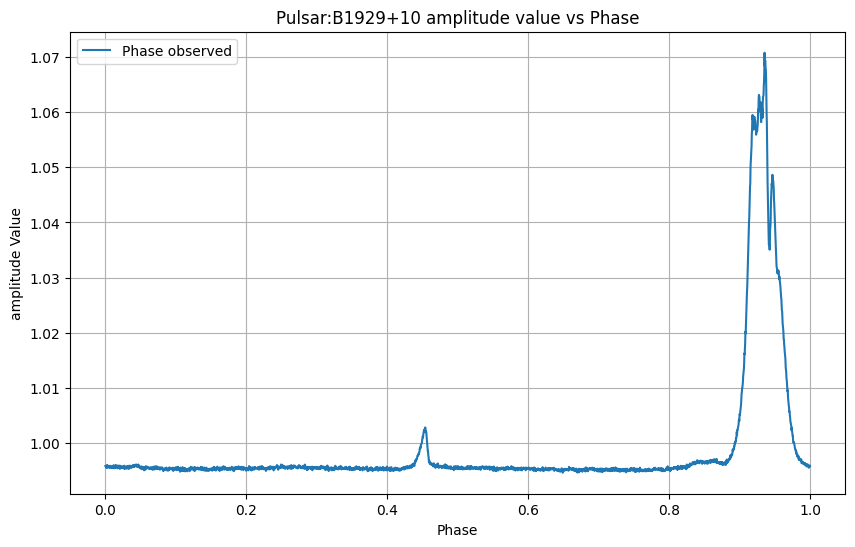

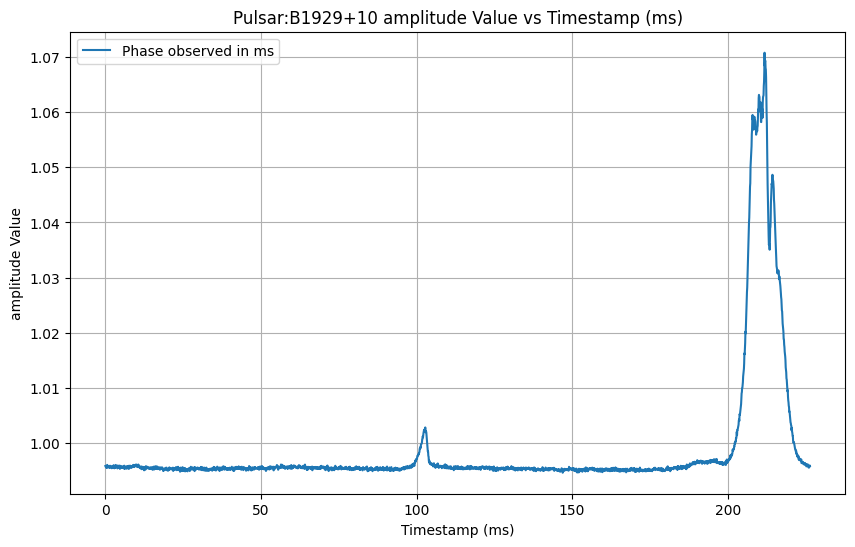

In [13]:
# Plot colname value vs timestamp_MJD for psr2
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr2_mjd2['timestamp_MJD'], df_profile_psr2_mjd2['value'], linestyle='-', label='Phase observed timestamp (MJD)')
plt.xlabel('Timestamp (MJD)')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr2} amplitude Value vs Timestamp (MJD) ')
plt.xlim(min(df_profile_psr2_mjd2['timestamp_MJD']), max(df_profile_psr2_mjd2['timestamp_MJD']))
plt.grid()
plt.legend()
plt.show()

# Plot colname value vs phase for psr2
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr2_mjd2['#phase'], df_profile_psr2_mjd2['value'], linestyle='-', label='Phase observed')
plt.xlabel('Phase')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr2} amplitude value vs Phase')
plt.grid()
plt.legend()
plt.show()

# Plot colname value vs timestamp(ms) for psr2
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr2_mjd2['time_stamp(ms)'], df_profile_psr2_mjd2['value'], linestyle='-', label='Phase observed in ms')
plt.xlabel('Timestamp (ms)')
plt.ylabel('amplitude Value')
plt.title(f'Pulsar:{psr2} amplitude Value vs Timestamp (ms)')
plt.grid()
plt.legend()
plt.show()


### Phase prediction code using tempo2 polyco 
- The polycos for different frequeince including the frequency of observation(550.049) were generated for further tests on dispersion of pulse 

### PULSAR 1

In [ ]:
import subprocess
import pandas as pd
import numpy as np

# parameters (change as needed) The code should work for sweeping multiple parameters in polyco, ideally made to test polyco while avoiding to run it multiple times
mjd_start_values = [60327]  # UTC
mjd_end_values = [60327]  # UTC
nspan_values = [60]  # in min
ncoeffs_values = [3]  # this is currently fixed do not change this
maxha_values = [12] #hours
telescope_code_values = ['GMRT']
frequencies = [500,550.049,650,750] #to check at multiple frequencies 

par_file_name = "B1702-19.par"  # Add your par file name here

# generate input files for different parameter combinations
with open("output_file.txt", 'w') as file:
    for frequency in frequencies:
        for mjd_start in mjd_start_values:
            for mjd_end in mjd_end_values:
                for nspan in nspan_values:
                    for ncoeffs in ncoeffs_values:
                        for maxha in maxha_values:
                            for telescope_code in telescope_code_values:
                                output_file = f"tempo2_input_{mjd_start}_{mjd_end}_{nspan}_{ncoeffs}_{maxha}_{telescope_code}_{frequency}.txt"
                                parameter_values = [mjd_start, mjd_end, nspan, ncoeffs, maxha, telescope_code, frequency,par_file_name]
                                line = " ".join(map(str, parameter_values)) + "\n"
                                file.write(line)

# AWK commands

# To capture the parameters from the parameter sweep file and run tempo2 polyco on it
with open("tempo_param_capture_update.awk", 'r') as awk_file:
    awk_command = awk_file.read()
subprocess.run(f'awk \'{awk_command}\' output_file.txt | sh', shell=True)

- To check the polyco outputs 

In [475]:
!mv 500polyco_new.dat psr1_550polyco_new.dat

In [15]:
!mv 550.049polyco_new.dat psr1_550.049polyco_new.dat #run this for the current analysis

In [477]:
!mv 600polyco_new.dat psr1_600polyco_new.dat

In [590]:
!mv 650polyco_new.dat psr1_650polyco_new.dat

### PULSAR2

In [ ]:
import subprocess
import pandas as pd
import numpy as np

# parameters (change as needed) The code should work for sweeping multiple parameters in polyco, ideally made to test polyco while avoiding to run it multiple times
mjd_start_values = [60327]  # UTC
mjd_end_values = [60327]  # UTC
nspan_values = [60]  # in min
ncoeffs_values = [3]  # this is currently fixed do not change this
maxha_values = [12] #hours
telescope_code_values = ['GMRT']
frequencies = [50,550.049,600] #to check at multiple frequencies 

par_file_name = "B1929+10.par"  # Add your par file name here

# generate input files for different parameter combinations
with open("output_file.txt", 'w') as file:
    for frequency in frequencies:
        for mjd_start in mjd_start_values:
            for mjd_end in mjd_end_values:
                for nspan in nspan_values:
                    for ncoeffs in ncoeffs_values:
                        for maxha in maxha_values:
                            for telescope_code in telescope_code_values:
                                output_file = f"tempo2_input_{mjd_start}_{mjd_end}_{nspan}_{ncoeffs}_{maxha}_{telescope_code}_{frequency}.txt"
                                parameter_values = [mjd_start, mjd_end, nspan, ncoeffs, maxha, telescope_code, frequency,par_file_name]
                                line = " ".join(map(str, parameter_values)) + "\n"
                                file.write(line)

# AWK commands

# To capture the parameters from the parameter sweep file and run tempo2 polyco on it
with open("tempo_param_capture_update.awk", 'r') as awk_file:
    awk_command = awk_file.read()
subprocess.run(f'awk \'{awk_command}\' output_file.txt | sh', shell=True)

In [479]:
!mv 500polyco_new.dat psr2_550polyco_new.dat

In [17]:
!mv 550.049polyco_new.dat psr2_550.049polyco_new.dat #run this 

In [481]:
!mv 600polyco_new.dat psr2_600polyco_new.dat

### Analysis of Prediction at Observation frequency : 550.049 MHz 

### Phase prediction PSR1 

#### Relevant Output (Polycos at TMID closes to observation MJD)

1705-1906  18-Jan-24   50000.00   60327.20833333330            22.907185 -0.644 -5.957
   3350439532.602748    3.344622243443 GMRT   60    3   550.049                
 -1.83910695481150200e-07  1.29325154640318862e-02 -5.05516201401089450e-07
1705-1906  18-Jan-24   60000.00   60327.24999999990            22.907185 -0.642 -5.556
   3350451574.016967    3.344622243443 GMRT   60    3   550.049                
 -1.66005507341274706e-07  1.28742963291054689e-02 -4.59277112740315981e-07

### Relevant output at 650 MHz (just for trial)

1705-1906  18-Jan-24   50000.00   60327.20833333330            22.907185 -0.644 -5.957
   3350439532.901090    3.344622243443 GMRT   60    3   650.000                
 -1.83768141543443200e-07  1.29325124154634798e-02 -5.05514889090936377e-07

In [18]:
#Define the required constants here 
phase_at_closest_MJD_to_observation = 3350439532.602748# 60327.20833333330

f0 = 3.344622243443
rphase = phase_at_closest_MJD_to_observation
tmid =  60327.20833333330
coeff1 = -1.83910695481150200e-07
coeff2 = 1.29325154640318862e-02 
coeff3 = -5.05516201401089450e-07

In [19]:
## To calculate the absolute phase at each timestamp in the pulse ##
psr1_mjd1_phase_at_mjd = []
for mjd in df_profile_psr1_mjd1['timestamp_MJD']:
    phase_MJD_in = mjd
    phase,freq,dt = calculate_phase_and_frequency(phase_MJD_in,tmid,rphase,coeff1, coeff2, coeff3,f0)
    psr1_mjd1_phase_at_mjd.append(phase)

In [20]:
##calculate fractional phase##
psr1_mjd1_frac_phase_values_at_mjd = []
init_phase_polyco = psr1_mjd1_phase_at_mjd[0]%1.0 #intialize phase at the starting MJD of the observation 
for phase in psr1_mjd1_phase_at_mjd:

    phase = phase - init_phase_polyco

    # Calculate fractional phase
    frac_phase = (phase % 1.0)
    psr1_mjd1_frac_phase_values_at_mjd.append(frac_phase)

In [21]:
## To calculate the absolute phase at each timestamp in the pulse ##
psr1_mjd2_phase_at_mjd = [] #from tempo2
for mjd in df_profile_psr1_mjd2['timestamp_MJD']:
    phase_MJD_in = mjd
    phase,freq,dt = calculate_phase_and_frequency(phase_MJD_in,tmid,rphase,coeff1, coeff2, coeff3,f0)
    psr1_mjd2_phase_at_mjd.append(phase)

In [22]:
## To calculate the fractional phase at each timestamp in the pulse ##
psr1_mjd2_frac_phase_values_at_mjd = []
init_phase_polyco = psr1_mjd2_phase_at_mjd[0]%1.0 #intialize phase at the starting MJD of the observation 
for phase in psr1_mjd2_phase_at_mjd:

    phase = phase - init_phase_polyco

    # Calculate fractional phase
    frac_phase = (phase % 1.0)
    psr1_mjd2_frac_phase_values_at_mjd.append(frac_phase)

### Phase prediction PSR2

#### Relevant Output 

1932+1059  18-Jan-24   43000.00   60327.18750000000             3.183447 -0.008 -5.280
   1040217011.926899    4.414645651890 GMRT   60    3   550.049                
 -2.04938964084874298e-07  2.13049020330627331e-04 -5.47269951898037655e-07
1932+1059  18-Jan-24   53000.00   60327.22916666660             3.183447 -0.005 -5.509
   1040232904.661932    4.414645651890 GMRT   60    3   550.049                
 -2.35800912034299097e-07  1.40982893753824963e-04 -6.46782975443600966e-07

In [23]:
#Define the required constants here for psr2 mjd1

f0_1 = 4.414645651890
rphase_1 = 1040217011.926899
tmid_1 =  60327.18750000000 
coeff1_1 = -2.04938964084874298e-07
coeff2_1 = 2.13049020330627331e-04
coeff3_1 = -5.47269951898037655e-07

In [24]:
#Define the required constants here for psr2 mjd2

f0_2 = 4.414645651890
rphase_2 =1040232904.661932
tmid_2 =  60327.22916666660 
coeff1_2 = -2.35800912034299097e-07
coeff2_2 =  1.40982893753824963e-04 
coeff3_2 = -6.46782975443600966e-07

In [25]:
psr2_mjd1_phase_at_mjd = []
for mjd in df_profile_psr2_mjd1['timestamp_MJD']:
    phase_MJD_in = mjd
    phase,freq,dt = calculate_phase_and_frequency(phase_MJD_in,tmid_1,rphase_1,coeff1_1, coeff2_1, coeff3_1,f0_1)
    psr2_mjd1_phase_at_mjd.append(phase)

In [26]:
##calculate fractional phase##
psr2_mjd1_frac_phase_values_at_mjd = []
init_phase_polyco = psr2_mjd1_phase_at_mjd[0]%1.0 #intialize phase at the starting MJD of the observation 
for phase in psr2_mjd1_phase_at_mjd:

    phase = phase - init_phase_polyco

    # Calculate fractional phase
    frac_phase = (phase % 1.0)
    psr2_mjd1_frac_phase_values_at_mjd.append(frac_phase)

In [27]:
psr2_mjd2_phase_at_mjd = []
for mjd in df_profile_psr2_mjd2['timestamp_MJD']:
    phase_MJD_in = mjd
    phase,freq,dt = calculate_phase_and_frequency(phase_MJD_in,tmid_2,rphase_2,coeff1_2, coeff2_2, coeff3_2,f0_2)
    psr2_mjd2_phase_at_mjd.append(phase)

In [28]:
##calculate fractional phase##
psr2_mjd2_frac_phase_values_at_mjd = []
init_phase_polyco = psr2_mjd2_phase_at_mjd[0]%1.0 #intialize phase at the starting MJD of the observation 
for phase in psr2_mjd2_phase_at_mjd:

    phase = phase - init_phase_polyco

    # Calculate fractional phase
    frac_phase = (phase % 1.0)
    psr2_mjd2_frac_phase_values_at_mjd.append(frac_phase)

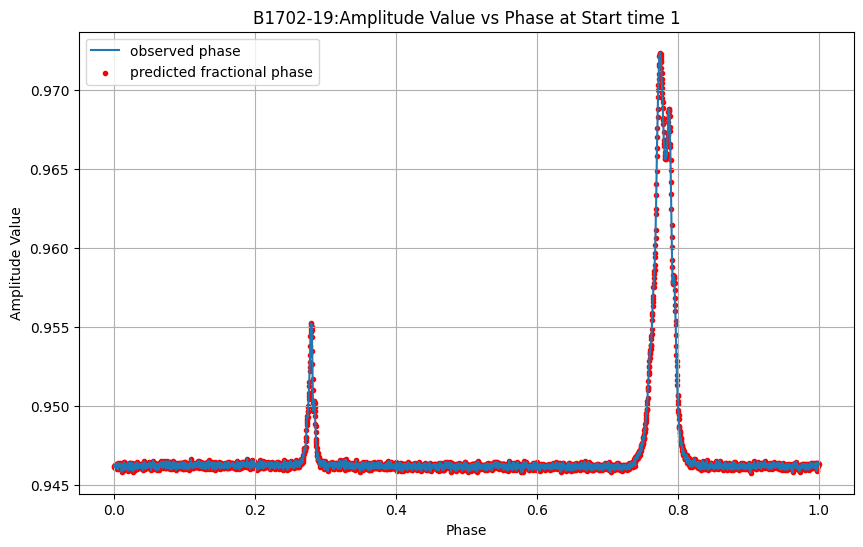

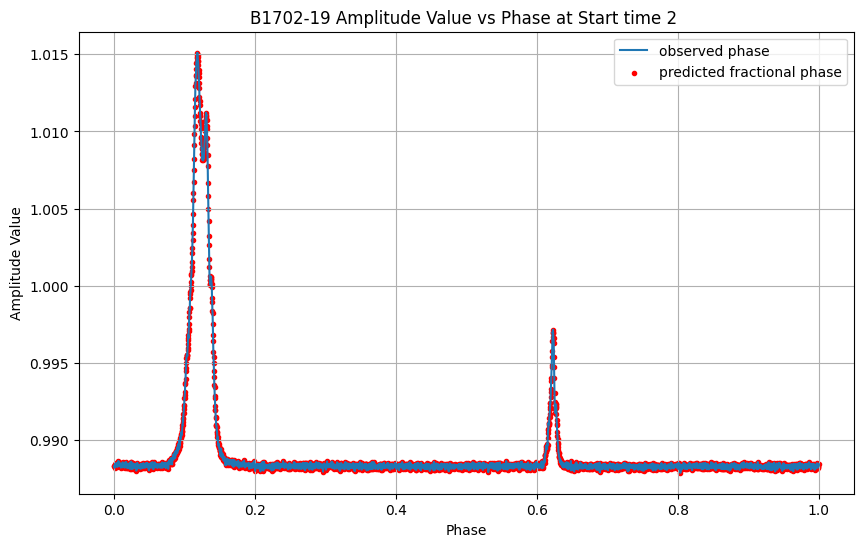

In [29]:
#Plot the observed phase and the predicted fractional phase together
plt.figure(figsize=(10, 6))
# Plot observed phase against amplitude value
plt.plot(df_profile_psr1_mjd1['#phase'], df_profile_psr1_mjd1['value'], linestyle='-', label='observed phase')

# Plot predicted normalized phase against amplitude value
plt.scatter(psr1_mjd1_frac_phase_values_at_mjd, df_profile_psr1_mjd1['value'], marker='.',color='r' ,label='predicted fractional phase')

plt.xlabel('Phase')
plt.ylabel('Amplitude Value')
plt.title(f'{psr1}:Amplitude Value vs Phase at Start time 1')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr1_mjd2['#phase'], df_profile_psr1_mjd2['value'], linestyle='-', label='observed phase')

# Plot predicted normalized phase against amplitude value
plt.scatter(psr1_mjd2_frac_phase_values_at_mjd, df_profile_psr1_mjd2['value'], marker='.',color='r' ,label='predicted fractional phase')

plt.xlabel('Phase')
plt.ylabel('Amplitude Value')
plt.title(f'{psr1} Amplitude Value vs Phase at Start time 2 ')
plt.legend()
plt.grid()
plt.show()

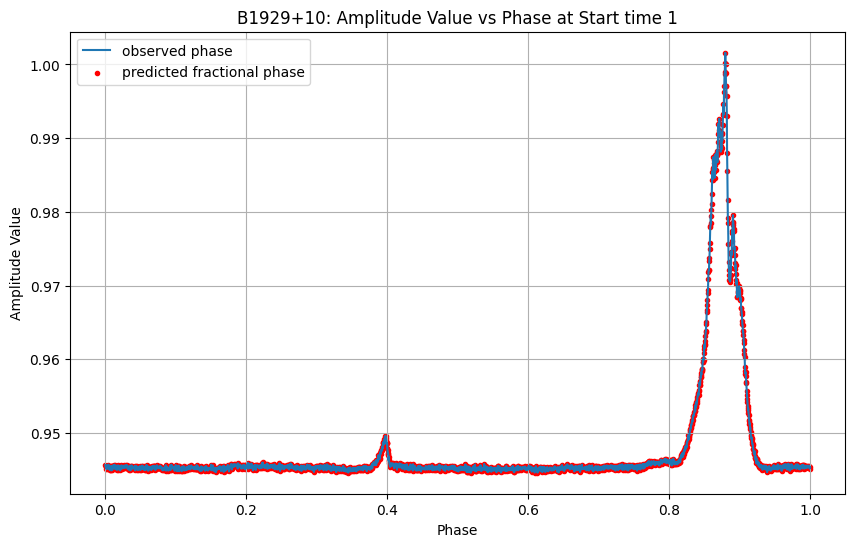

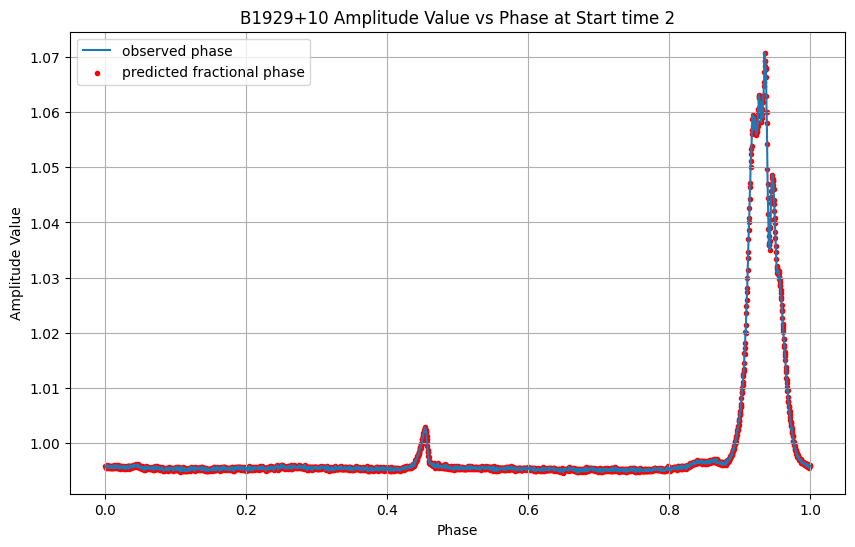

In [30]:
#Plot for psr2 - Start time 1
plt.figure(figsize=(10, 6))
# Plot observed phase against amplitude value
plt.plot(df_profile_psr2_mjd1['#phase'], df_profile_psr2_mjd1['value'], linestyle='-', label='observed phase')

# Plot predicted normalized phase against amplitude value
plt.scatter(psr2_mjd1_frac_phase_values_at_mjd, df_profile_psr2_mjd1['value'], marker='.', color='r', label='predicted fractional phase')

plt.xlabel('Phase')
plt.ylabel('Amplitude Value')
plt.title(f'{psr2}: Amplitude Value vs Phase at Start time 1')
plt.legend()
plt.grid()
plt.show()

# Plot for psr2 - Start time 2
plt.figure(figsize=(10, 6))
plt.plot(df_profile_psr2_mjd2['#phase'], df_profile_psr2_mjd2['value'], linestyle='-', label='observed phase')

# Plot predicted normalized phase against amplitude value
plt.scatter(psr2_mjd2_frac_phase_values_at_mjd, df_profile_psr2_mjd2['value'], marker='.', color='r', label='predicted fractional phase')

plt.xlabel('Phase')
plt.ylabel('Amplitude Value')
plt.title(f'{psr2} Amplitude Value vs Phase at Start time 2')
plt.legend()
plt.grid()
plt.show()

### **conclusion of the analysis till now**
- The predicted shows an agreement with the observed phase 

### **Define TOA in the profile :**
- The phase bin with maxinum amplitude is defined as the TOA , the values of the observed toas for start time one and start time 2 are plotted below

#### Observed TOA for PSR1 at start time 1 and 2 respectively

In [31]:
#find the index with max amplitude
max_amplitude_index_psr1_mjd2 = df_profile_psr1_mjd2['value'].idxmax() 
max_amplitude_index_psr1_mjd1 = df_profile_psr1_mjd1['value'].idxmax()

#Get the MJD value : TOA 
psr1_mjd_toa_mjd2 = df_profile_psr1_mjd2['timestamp_MJD'].iloc[max_amplitude_index_psr1_mjd2] 
psr1_mjd_toa_mjd1 = df_profile_psr1_mjd1['timestamp_MJD'].iloc[max_amplitude_index_psr1_mjd1]

#Get the observed phase at TOA 
psr1_phase_mjd_toa_mjd1 = df_profile_psr1_mjd1['#phase'].iloc[max_amplitude_index_psr1_mjd1]
psr1_phase_mjd_toa_mjd2 = df_profile_psr1_mjd2['#phase'].iloc[max_amplitude_index_psr1_mjd2]

#### Observed TOA for PSR2 at start time 1 and 2 respectively

In [32]:
# Find the index with max amplitude for psr2
max_amplitude_index_psr2_mjd2 = df_profile_psr2_mjd2['value'].idxmax()
max_amplitude_index_psr2_mjd1 = df_profile_psr2_mjd1['value'].idxmax()

# Get the MJD value (TOA) for psr2
psr2_mjd_toa_mjd2 = df_profile_psr2_mjd2['timestamp_MJD'].iloc[max_amplitude_index_psr2_mjd2]
psr2_mjd_toa_mjd1 = df_profile_psr2_mjd1['timestamp_MJD'].iloc[max_amplitude_index_psr2_mjd1]

# Get the observed phase at TOA for psr2
psr2_phase_mjd_toa_mjd1 = df_profile_psr2_mjd1['#phase'].iloc[max_amplitude_index_psr2_mjd1]
psr2_phase_mjd_toa_mjd2 = df_profile_psr2_mjd2['#phase'].iloc[max_amplitude_index_psr2_mjd2]


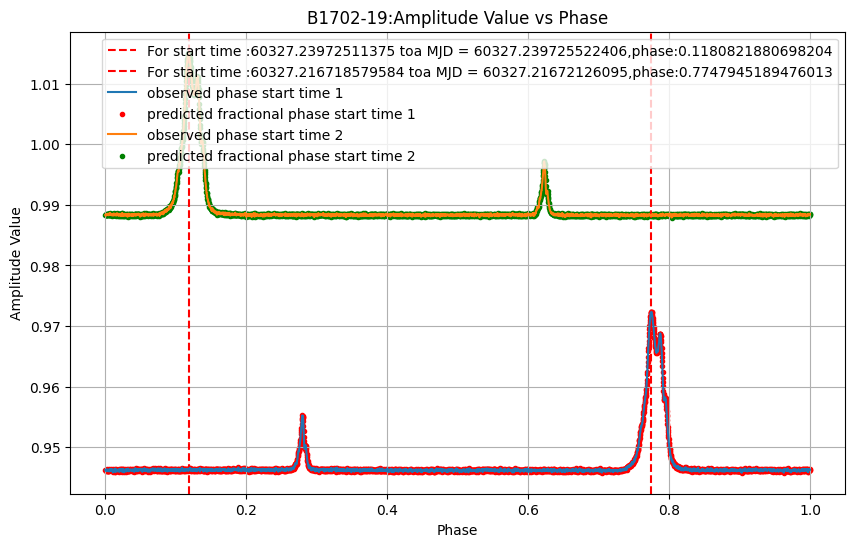

In [33]:
#Plot the observed phase and the predicted fractional phase together
plt.figure(figsize=(10, 6))
plt.axvline(psr1_phase_mjd_toa_mjd2, linestyle='--', color = 'r',label = f'For start time :{MJD_observation_psr_1_mjd_2} toa MJD = {psr1_mjd_toa_mjd2},phase:{psr1_phase_mjd_toa_mjd2}')
plt.axvline(psr1_phase_mjd_toa_mjd1, linestyle='--',color = 'red', label = f'For start time :{MJD_observation_psr_1_mjd_1} toa MJD = {psr1_mjd_toa_mjd1},phase:{psr1_phase_mjd_toa_mjd1}')
# Plot observed phase against amplitude value
plt.plot(df_profile_psr1_mjd1['#phase'], df_profile_psr1_mjd1['value'], linestyle='-', label='observed phase start time 1')

# Plot predicted normalized phase against amplitude value
plt.scatter(psr1_mjd1_frac_phase_values_at_mjd, df_profile_psr1_mjd1['value'], marker='.',color='r' ,label='predicted fractional phase start time 1')

plt.plot(df_profile_psr1_mjd2['#phase'], df_profile_psr1_mjd2['value'], linestyle='-', label='observed phase start time 2')

# Plot predicted normalized phase against amplitude value
plt.scatter(psr1_mjd2_frac_phase_values_at_mjd, df_profile_psr1_mjd2['value'], marker='.',color='g' ,label='predicted fractional phase start time 2' )


plt.xlabel('Phase')
plt.ylabel('Amplitude Value')
plt.title(f'{psr1}:Amplitude Value vs Phase')
plt.legend()
plt.grid()
plt.show()

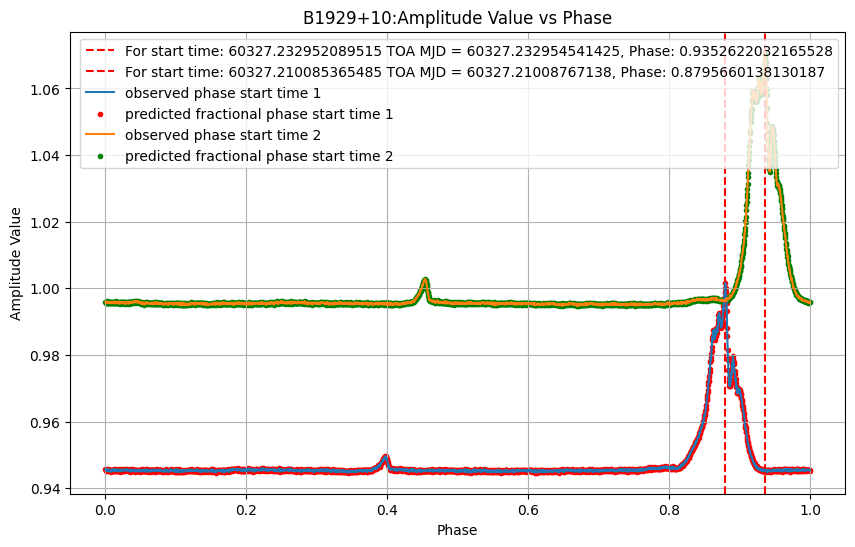

In [34]:
#Plot the observed phase and the predicted fractional phase together
plt.figure(figsize=(10, 6))
plt.axvline(psr2_phase_mjd_toa_mjd2, linestyle='--', color='r', label=f'For start time: {MJD_observation_psr_2_mjd_2} TOA MJD = {psr2_mjd_toa_mjd2}, Phase: {psr2_phase_mjd_toa_mjd2}')
plt.axvline(psr2_phase_mjd_toa_mjd1, linestyle='--', color='red', label=f'For start time: {MJD_observation_psr_2_mjd_1} TOA MJD = {psr2_mjd_toa_mjd1}, Phase: {psr2_phase_mjd_toa_mjd1}')

# Plot observed phase against amplitude value
plt.plot(df_profile_psr2_mjd1['#phase'], df_profile_psr2_mjd1['value'], linestyle='-', label='observed phase start time 1')

# Plot predicted normalized phase against amplitude value
plt.scatter(psr2_mjd1_frac_phase_values_at_mjd, df_profile_psr2_mjd1['value'], marker='.',color='r' ,label='predicted fractional phase start time 1')

plt.plot(df_profile_psr2_mjd2['#phase'], df_profile_psr2_mjd2['value'], linestyle='-', label='observed phase start time 2')

# Plot predicted normalized phase against amplitude value
plt.scatter(psr2_mjd2_frac_phase_values_at_mjd, df_profile_psr2_mjd2['value'], marker='.',color='g' ,label='predicted fractional phase start time 2' )


plt.xlabel('Phase')
plt.ylabel('Amplitude Value')
plt.title(f'{psr2}:Amplitude Value vs Phase')
plt.legend()
plt.grid()
plt.show()

Now if we are interested in the prediction of phases at the TOAs we should see what are the predicted values of phases at toa 

In [35]:
psr1_predicted_phase_mjd_toa_mjd1,freq_1,dt_1 = calculate_phase_and_frequency(psr1_mjd_toa_mjd1,tmid,rphase,coeff1, coeff2, coeff3,f0)
psr1_predicted_phase_mjd_toa_mjd2 ,freq_2,dt_2= calculate_phase_and_frequency(psr1_mjd_toa_mjd2,tmid,rphase,coeff1, coeff2, coeff3,f0)
psr1_predicted_frac_phase_mjd_toa_mjd1 = (psr1_predicted_phase_mjd_toa_mjd1-psr1_mjd1_phase_at_mjd[0]%1.0)%1.0
psr1_predicted_frac_phase_mjd_toa_mjd2 = (psr1_predicted_phase_mjd_toa_mjd2-psr1_mjd2_phase_at_mjd[0]%1.0)%1.0

print(f'pred_phase_toa1({psr1_mjd_toa_mjd1})_psr1 = {psr1_predicted_frac_phase_mjd_toa_mjd1},pred_phase_toa2({psr1_mjd_toa_mjd2})_psr1 = {psr1_predicted_frac_phase_mjd_toa_mjd2}')
print(f'observed_phase_toa1({psr1_mjd_toa_mjd1})_psr1 = {psr1_phase_mjd_toa_mjd1},observed_phase_toa2({psr1_mjd_toa_mjd2})_psr1 = {psr1_phase_mjd_toa_mjd2}')

pred_phase_toa1(60327.21672126095)_psr1 = 0.7748985290527344,pred_phase_toa2(60327.239725522406)_psr1 = 0.11809873580932617
observed_phase_toa1(60327.21672126095)_psr1 = 0.7747945189476013,observed_phase_toa2(60327.239725522406)_psr1 = 0.1180821880698204


In [36]:
psr2_predicted_phase_mjd_toa_mjd1, freq_1, dt_1 = calculate_phase_and_frequency(psr2_mjd_toa_mjd1, tmid_1, rphase_1, coeff1_1, coeff2_1, coeff3_1, f0_1)
psr2_predicted_phase_mjd_toa_mjd2, freq_2, dt_2 = calculate_phase_and_frequency(psr2_mjd_toa_mjd2, tmid_2, rphase_2, coeff1_2, coeff2_2, coeff3_2, f0_2)
psr2_predicted_frac_phase_mjd_toa_mjd1 = (psr2_predicted_phase_mjd_toa_mjd1 - psr2_mjd1_phase_at_mjd[0] % 1.0) % 1.0
psr2_predicted_frac_phase_mjd_toa_mjd2 = (psr2_predicted_phase_mjd_toa_mjd2 - psr2_mjd2_phase_at_mjd[0] % 1.0) % 1.0

print(f'pred_phase_toa1({psr2_mjd_toa_mjd1})_psr2 = {psr2_predicted_frac_phase_mjd_toa_mjd1}, pred_phase_toa2({psr2_mjd_toa_mjd2})_psr2 = {psr2_predicted_frac_phase_mjd_toa_mjd2}')
print(f'observed_phase_toa1({psr2_mjd_toa_mjd1})_psr2 = {psr2_phase_mjd_toa_mjd1},observed_phase_toa2({psr2_mjd_toa_mjd2})_psr2 = {psr2_phase_mjd_toa_mjd2}')

pred_phase_toa1(60327.21008767138)_psr2 = 0.8795280456542969, pred_phase_toa2(60327.232954541425)_psr2 = 0.9352213144302368
observed_phase_toa1(60327.21008767138)_psr2 = 0.8795660138130187,observed_phase_toa2(60327.232954541425)_psr2 = 0.9352622032165528


### How can we predict the next toa 
- It can been seen that the phase for the toa is predicted to a high accuracy 
- Can we get the next toas 

### Prediction from the toa1 to the next mjd observation time 

#### PULSAR 1 TOA prediction 

In [38]:
psr1_absolute_phase_at_toa_mjd = []
psr1_frac_phase_at_toa_mjd = []
time_elapsed_values = []
psr1_toa_mjd_values = []

mjd_in = psr1_mjd_toa_mjd1  #the first toa value known from observation 
phase_init =  psr1_mjd2_phase_at_mjd[0]%1.0 # we want the phase with respect to the start time of the next observation 
f0 = 3.344622243443
estimated_number_of_rotations = int((MJD_observation_psr_1_mjd_2 - psr1_mjd_toa_mjd1) * 24 * 60 * 60 * f0 +2)

min_difference = float('inf')
closest_time_elapsed = None

for i in range(estimated_number_of_rotations):
    phase, freq, dt = calculate_phase_and_frequency(mjd_in, tmid, rphase, coeff1, coeff2, coeff3, f0)
    
    psr1_absolute_phase_at_toa_mjd.append(phase)
    period = 1 / freq
    #print(f"Iteration {i + 1}: Period = {period*1000}")
    phase = phase - phase_init # phase wrt to MJD toa 1
    # Calculate fractional phase
    frac_phase_toa = (phase % 1.0)
    time_elapsed = (mjd_in - psr1_mjd_toa_mjd1) * 1440  # min

    psr1_toa_mjd_values.append(mjd_in)
    
    psr1_frac_phase_at_toa_mjd.append(frac_phase_toa)
    time_elapsed_values.append(time_elapsed)
    # Update mjd_in for the next iteration
    next_toa_mjd = mjd_in + (period / (24 * 60 * 60))
    mjd_in = next_toa_mjd

    # Check the difference and update if it's smaller
    difference = abs(time_elapsed - ((MJD_observation_psr_1_mjd_2 - MJD_observation_psr_1_mjd_1) * 1440))
    if difference < min_difference:
        min_difference = difference
        closest_time_elapsed = time_elapsed

# Print the closest match
print(f"Closest match to the observation time found at time_elapsed: {closest_time_elapsed:.2f} minutes.")
index_of_closest_match = abs(np.array(time_elapsed_values) - closest_time_elapsed).argmin()
psr1_pred_toa =  psr1_toa_mjd_values[index_of_closest_match]
psr1_pred_toa_phase = psr1_frac_phase_at_toa_mjd[index_of_closest_match]
print(f"TOA value predicted: {psr1_toa_mjd_values[index_of_closest_match]}")
print(f"Corresponding Absolute phase: {psr1_absolute_phase_at_toa_mjd[index_of_closest_match]}")
print(f"Corresponding Fractional phase: {psr1_frac_phase_at_toa_mjd[index_of_closest_match]}")


Closest match to the observation time found at time_elapsed: 33.13 minutes.
TOA value predicted: 60327.23972518972
Corresponding Absolute phase: 3350448604.6593876
Corresponding Fractional phase: 0.02195453643798828


#### PULSAR 2 TOA prediction 

In [39]:
psr2_absolute_phase_at_toa_mjd = []
psr2_frac_phase_at_toa_mjd = []
time_elapsed_values = []
psr2_toa_mjd_values = []

mjd_in = psr2_mjd_toa_mjd1  #the first toa value known from observation 
phase_init =  psr2_mjd2_phase_at_mjd[0]%1.0 # we want the phase with respect to the start time of the next observation 

estimated_number_of_rotations = int((MJD_observation_psr_2_mjd_2 - psr2_mjd_toa_mjd1) * 24 * 60 * 60 * f0_1 +2)

min_difference = float('inf')
closest_time_elapsed = None

for i in range(estimated_number_of_rotations):
    if mjd_in <= tmid_2:
        phase, freq, dt = calculate_phase_and_frequency(mjd_in, tmid_1, rphase_1, coeff1_1, coeff2_1, coeff3_1, f0_1)
    else:
        phase, freq, dt = calculate_phase_and_frequency(mjd_in, tmid_2, rphase_2, coeff1_2, coeff2_2, coeff3_2, f0_2)
    
    # Change here: Append to psr2 list instead of psr1 list
    psr2_absolute_phase_at_toa_mjd.append(phase)
    period = 1 / freq
    phase = phase - phase_init  # phase wrt to MJD toa 1

    # Calculate fractional phase
    frac_phase_toa = (phase % 1.0)
    time_elapsed = (mjd_in - psr2_mjd_toa_mjd1) * 1440  # min

    psr2_toa_mjd_values.append(mjd_in)
    psr2_frac_phase_at_toa_mjd.append(frac_phase_toa)
    time_elapsed_values.append(time_elapsed)
    # Update mjd_in for the next iteration
    next_toa_mjd = mjd_in + (period / (24 * 60 * 60))
    mjd_in = next_toa_mjd

    # Check the difference and update if it's smaller
    difference = abs(time_elapsed - ((MJD_observation_psr_2_mjd_2 - MJD_observation_psr_2_mjd_1) * 1440))
    if difference < min_difference:
        min_difference = difference
        closest_time_elapsed = time_elapsed

# Print the closest match
print(f"Closest match to the observation time found at time_elapsed: {closest_time_elapsed:.2f} minutes.")
index_of_closest_match = abs(np.array(time_elapsed_values) - closest_time_elapsed).argmin()
psr2_pred_toa =  psr2_toa_mjd_values[index_of_closest_match]
psr2_pred_toa_phase = psr2_frac_phase_at_toa_mjd[index_of_closest_match]
print(f"TOA value at observation: {psr2_toa_mjd_values[index_of_closest_match]}")
print(f"Corresponding Absolute phase: {psr2_absolute_phase_at_toa_mjd[index_of_closest_match]}")
print(f"Corresponding Fractional phase: {psr2_frac_phase_at_toa_mjd[index_of_closest_match]}")

Closest match to the observation time found at time_elapsed: 32.93 minutes.
TOA value at observation: 60327.23295453831
Corresponding Absolute phase: 1040234349.4531051
Corresponding Fractional phase: 0.9340335130691528


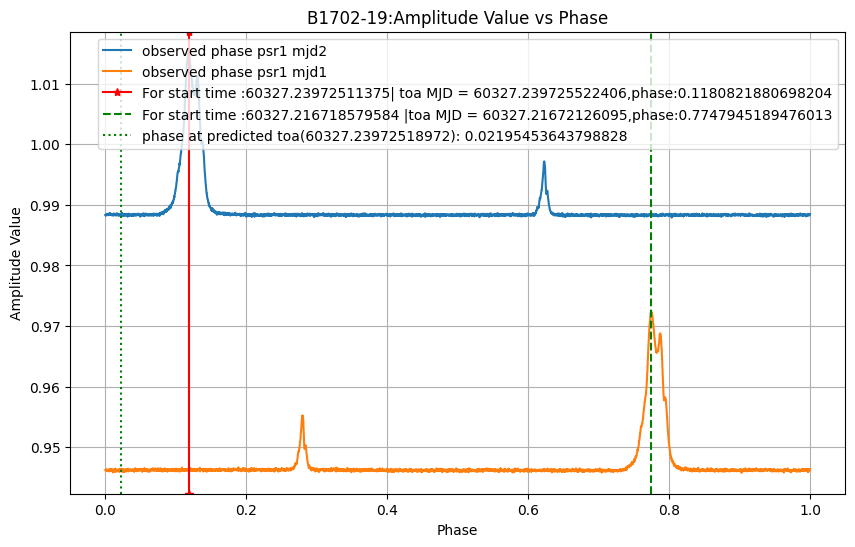

In [40]:
plt.figure(figsize=(10, 6))

plt.plot(df_profile_psr1_mjd2['#phase'],df_profile_psr1_mjd2['value'],label='observed phase psr1 mjd2')
plt.plot(df_profile_psr1_mjd1['#phase'],df_profile_psr1_mjd1['value'],label='observed phase psr1 mjd1')
plt.axvline(psr1_phase_mjd_toa_mjd2, marker = '*',linestyle='-', color = 'r',label = f'For start time :{MJD_observation_psr_1_mjd_2}| toa MJD = {psr1_mjd_toa_mjd2},phase:{psr1_phase_mjd_toa_mjd2}')
#plt.axvline(psr1_predicted_frac_phase_mjd_toa_mjd2, linestyle='dotted',color = 'r', label = f'For start time :{MJD_observation_psr_1_mjd_2} |toa MJD = {psr1_mjd_toa_mjd2},predicted phase:{psr1_predicted_frac_phase_mjd_toa_mjd2}')
plt.axvline(psr1_phase_mjd_toa_mjd1, linestyle='--',color = 'green', label = f'For start time :{MJD_observation_psr_1_mjd_1} |toa MJD = {psr1_mjd_toa_mjd1},phase:{psr1_phase_mjd_toa_mjd1}')
#plt.axvline(psr1_predicted_frac_phase_mjd_toa_mjd1, linestyle=':',color = 'green', label = f'For start time :{MJD_observation_psr_1_mjd_1} |toa MJD = {psr1_mjd_toa_mjd1},predicted phase:{psr1_predicted_frac_phase_mjd_toa_mjd1}')
plt.axvline(psr1_pred_toa_phase, linestyle=':',color = 'green',label = f'phase at predicted toa({psr1_pred_toa}): {psr1_pred_toa_phase}')
plt.legend(loc='upper left', fontsize='small', fancybox=True, framealpha=0.3)
plt.xlabel('Phase')
plt.ylabel('Amplitude Value')
plt.title(f'{psr1}:Amplitude Value vs Phase')
plt.legend()
plt.grid()
plt.show()

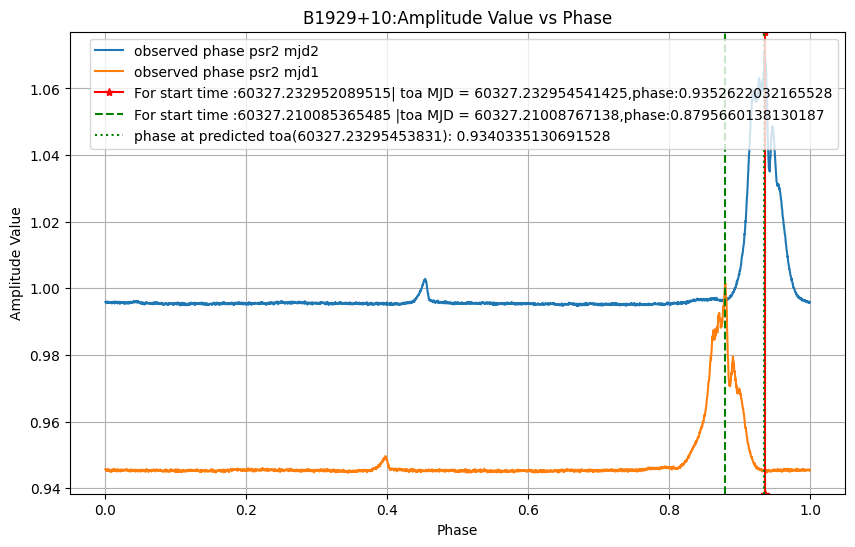

In [41]:
plt.figure(figsize=(10, 6))

plt.plot(df_profile_psr2_mjd2['#phase'],df_profile_psr2_mjd2['value'],label='observed phase psr2 mjd2')
plt.plot(df_profile_psr2_mjd1['#phase'],df_profile_psr2_mjd1['value'],label='observed phase psr2 mjd1')
plt.axvline(psr2_phase_mjd_toa_mjd2, marker = '*',linestyle='-', color = 'r',label = f'For start time :{MJD_observation_psr_2_mjd_2}| toa MJD = {psr2_mjd_toa_mjd2},phase:{psr2_phase_mjd_toa_mjd2}')
#plt.axvline(psr1_predicted_frac_phase_mjd_toa_mjd2, linestyle='dotted',color = 'r', label = f'For start time :{MJD_observation_psr_1_mjd_2} |toa MJD = {psr1_mjd_toa_mjd2},predicted phase:{psr1_predicted_frac_phase_mjd_toa_mjd2}')
plt.axvline(psr2_phase_mjd_toa_mjd1, linestyle='--',color = 'green', label = f'For start time :{MJD_observation_psr_2_mjd_1} |toa MJD = {psr2_mjd_toa_mjd1},phase:{psr2_phase_mjd_toa_mjd1}')
#plt.axvline(psr1_predicted_frac_phase_mjd_toa_mjd1, linestyle=':',color = 'green', label = f'For start time :{MJD_observation_psr_1_mjd_1} |toa MJD = {psr1_mjd_toa_mjd1},predicted phase:{psr1_predicted_frac_phase_mjd_toa_mjd1}')
plt.axvline(psr2_pred_toa_phase, linestyle=':',color = 'green',label = f'phase at predicted toa({psr2_pred_toa}): {psr2_pred_toa_phase}')
plt.legend(loc='upper left', fontsize='small', fancybox=True, framealpha=0.3)
plt.xlabel('Phase')
plt.ylabel('Amplitude Value')
plt.title(f'{psr2}:Amplitude Value vs Phase')
plt.legend()
plt.grid()
plt.show()


### Conclusions about the TOA prediction 
1. For PSR1 : B1702-19
    - There was an offset in the predicted MJD_toa at start time 2 , the offset is roughly 28 ms (reason is unknown)
    - The toa was calculated at different frequencies but there was no difference in the predicted time of arrival (reason unknown)Maybe because the DM is low 
2. FOR PSR2 : B1929+10
    - The prediction for mjd toa and its phase are fairly accurate with an offset of 0.269 ms 